<a href="https://colab.research.google.com/github/hany606/NM_Fall21IU/blob/main/Assignments/assignment5/NM_Assignment5_HanyHamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - NM
Name: Hany Hamed

# Sources

* https://medium.com/analytics-vidhya/advanced-regression-techniques-to-predict-home-prices-with-python-86caa9e0861d

* https://www.kaggle.com/eraaz1/a-comprehensive-guide-to-advanced-regression

* https://github.com/Nupurgopali/Traffic-Prediction-using-SVR-and-RFR/blob/master/Random_forest.py

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

plt.rcParams["figure.figsize"] = (20,7)


# Data processing

In [2]:
data = pd.read_csv('data_mod.csv')
print(data.columns)
data['Time'] = pd.to_datetime(data['Time'])
data.head()

Index(['Time', 'Intensity', 'Occupancy', 'Velocity', 'Velocity 85%',
       'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',
       'Intensity Bus', 'Intensity Trailer', '0<V<10', '10<V<20', '20<V<30',
       '30<V<40', '40<V<50', '50<V<60', '60<V<70', '70<V<80', '80<V<90',
       '90<V<100', '100<V<110', '110<V<120', '120<V<130', '130<V<500'],
      dtype='object')


,Time,Intensity,Occupancy,Velocity,Velocity 85%,Intensity Micro,Intensity Motorcar,Intensity Trac,Intensity Bus,Intensity Trailer,0<V<10,10<V<20,20<V<30,30<V<40,40<V<50,50<V<60,60<V<70,70<V<80,80<V<90,90<V<100,100<V<110,110<V<120,120<V<130,130<V<500
0,2021-07-06 14:55:00,1236,11.2,88.5,101.9,48,432,612,96,48,0,0,0,0,0,0,72,216,372,360,156,36,24,0
1,2021-07-06 14:50:00,1224,11.2,90.6,103.8,12,468,528,156,60,0,0,0,0,0,0,0,216,444,324,132,96,12,0
2,2021-07-06 14:45:00,1056,10.0,90.9,104.6,60,432,336,180,24,0,0,0,0,0,0,36,204,300,288,144,60,24,0
3,2021-07-06 14:40:00,1224,11.1,90.2,98.8,24,516,456,180,36,0,0,0,0,0,0,24,108,456,492,108,36,0,0
4,2021-07-06 14:35:00,996,9.0,89.6,100.5,12,420,432,108,24,0,0,0,0,0,0,0,216,312,300,108,60,0,0


In [3]:
data.head(100)

,Time,Intensity,Occupancy,Velocity,Velocity 85%,Intensity Micro,Intensity Motorcar,Intensity Trac,Intensity Bus,Intensity Trailer,0<V<10,10<V<20,20<V<30,30<V<40,40<V<50,50<V<60,60<V<70,70<V<80,80<V<90,90<V<100,100<V<110,110<V<120,120<V<130,130<V<500
0,2021-07-06 14:55:00,1236,11.2,88.5,101.9,48,432,612,96,48,0,0,0,0,0,0,72,216,372,360,156,36,24,0
1,2021-07-06 14:50:00,1224,11.2,90.6,103.8,12,468,528,156,60,0,0,0,0,0,0,0,216,444,324,132,96,12,0
2,2021-07-06 14:45:00,1056,10.0,90.9,104.6,60,432,336,180,24,0,0,0,0,0,0,36,204,300,288,144,60,24,0
3,2021-07-06 14:40:00,1224,11.1,90.2,98.8,24,516,456,180,36,0,0,0,0,0,0,24,108,456,492,108,36,0,0
4,2021-07-06 14:35:00,996,9.0,89.6,100.5,12,420,432,108,24,0,0,0,0,0,0,0,216,312,300,108,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-07-06 07:00:00,1296,10.0,97.0,112.6,36,660,516,72,12,0,0,0,0,0,0,0,36,420,396,192,192,36,24
96,2021-07-06 06:55:00,1368,10.5,96.2,107.8,36,792,444,84,12,0,0,0,0,0,0,0,84,300,492,336,120,36,0
97,2021-07-06 06:50:00,1128,9.7,91.9,102.3,24,516,468,96,24,0,0,0,0,0,0,0,144,360,360,168,84,0,12
98,2021-07-06 06:45:00,1308,11.0,95.9,106.2,12,660,420,192,24,0,0,0,0,0,0,0,48,384,420,300,132,12,12


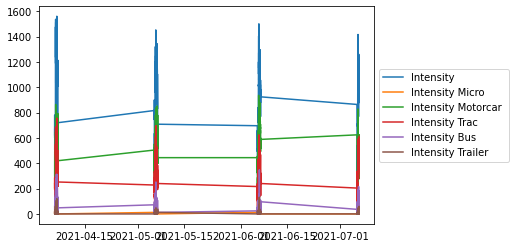

In [4]:
# fig = px.line(data[["Time","Intensity", "Velocity"]], x="Time", y="Intensity", template = 'plotly_dark')
# fig.show()

plt.plot(data["Time"], data[["Intensity", 'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',\
       'Intensity Bus', 'Intensity Trailer']])

plt.legend(["Intensity", 'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',
       'Intensity Bus', 'Intensity Trailer'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

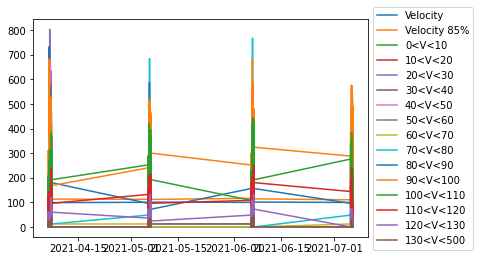

In [5]:
plt.plot(data["Time"], data[["Velocity", 'Velocity 85%', '0<V<10', '10<V<20', '20<V<30',
       '30<V<40', '40<V<50', '50<V<60', '60<V<70', '70<V<80', '80<V<90',
       '90<V<100', '100<V<110', '110<V<120', '120<V<130', '130<V<500']])
plt.legend(["Velocity", 'Velocity 85%', '0<V<10', '10<V<20', '20<V<30',
       '30<V<40', '40<V<50', '50<V<60', '60<V<70', '70<V<80', '80<V<90',
       '90<V<100', '100<V<110', '110<V<120', '120<V<130', '130<V<500'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

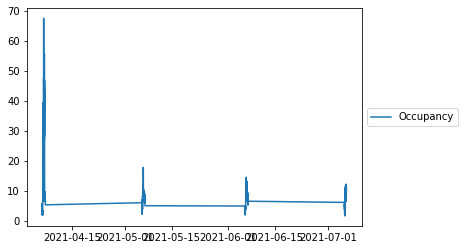

In [6]:
plt.plot(data["Time"], data["Occupancy"])
plt.legend(["Occupancy"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [7]:
# df1 = data.melt(id_vars=['Time', 'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',\
#        'Intensity Bus', 'Intensity Trailer'], var_name='AAPL')
# # print(['Time']+list(data.keys()[5:]))

# # ['Time', 'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',\
# #        'Intensity Bus', 'Intensity Trailer']
# print(df1.head())
# print(df1.columns)

# fig = px.line(df1, x='Time', y='value', color='AAPL', template = 'plotly_dark')

# fig.show()

In [54]:
# Split Time column to Day, hour, minute columns

hours = [d.hour for d in data["Time"]]
days = [d.month for d in data["Time"]]  # Just the format is wrong, so the month is the day and the day is the month
minutes = [d.minute for d in data["Time"]]

df = data.copy()
df["day"] = days
df["hour"] = hours
df["minute"] = minutes
print(df.columns)
df.head(500)

Index(['Time', 'Intensity', 'Occupancy', 'Velocity', 'Velocity 85%',
       'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',
       'Intensity Bus', 'Intensity Trailer', '0<V<10', '10<V<20', '20<V<30',
       '30<V<40', '40<V<50', '50<V<60', '60<V<70', '70<V<80', '80<V<90',
       '90<V<100', '100<V<110', '110<V<120', '120<V<130', '130<V<500', 'day',
       'hour', 'minute'],
      dtype='object')


,Time,Intensity,Occupancy,Velocity,Velocity 85%,Intensity Micro,Intensity Motorcar,Intensity Trac,Intensity Bus,Intensity Trailer,0<V<10,10<V<20,20<V<30,30<V<40,40<V<50,50<V<60,60<V<70,70<V<80,80<V<90,90<V<100,100<V<110,110<V<120,120<V<130,130<V<500,day,hour,minute
0,2021-07-06 14:55:00,1236,11.2,88.5,101.9,48,432,612,96,48,0,0,0,0,0,0,72,216,372,360,156,36,24,0,7,14,55
1,2021-07-06 14:50:00,1224,11.2,90.6,103.8,12,468,528,156,60,0,0,0,0,0,0,0,216,444,324,132,96,12,0,7,14,50
2,2021-07-06 14:45:00,1056,10.0,90.9,104.6,60,432,336,180,24,0,0,0,0,0,0,36,204,300,288,144,60,24,0,7,14,45
3,2021-07-06 14:40:00,1224,11.1,90.2,98.8,24,516,456,180,36,0,0,0,0,0,0,24,108,456,492,108,36,0,0,7,14,40
4,2021-07-06 14:35:00,996,9.0,89.6,100.5,12,420,432,108,24,0,0,0,0,0,0,0,216,312,300,108,60,0,0,7,14,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-05-06 19:15:00,1080,8.0,102.7,118.5,24,588,360,108,0,0,0,0,0,0,0,0,24,192,264,264,216,96,24,5,19,15
496,2021-05-06 19:10:00,1104,7.9,102.7,113.4,0,672,384,48,0,0,0,0,0,0,0,0,24,96,396,336,180,60,12,5,19,10
497,2021-05-06 19:05:00,996,7.3,99.6,113.7,48,552,336,48,12,0,0,0,0,0,0,0,0,180,408,180,192,12,24,5,19,5
498,2021-05-06 19:00:00,1284,8.9,101.8,115.8,24,852,360,48,0,0,0,0,0,0,0,0,36,180,360,396,180,108,12,5,19,0


In [38]:
X = df[["day", "hour", "minute"]]
Y = df[['Intensity', 'Occupancy', 'Velocity']]#, 'Velocity 85%',
    #    'Intensity Micro', 'Intensity Motorcar ', 'Intensity Trac ',
    #    'Intensity Bus', 'Intensity Trailer', '0<V<10', '10<V<20', '20<V<30',
    #    '30<V<40', '40<V<50', '50<V<60', '60<V<70', '70<V<80', '80<V<90',
    #    '90<V<100', '100<V<110', '110<V<120', '120<V<130', '130<V<500']]


In [10]:
X.head()

,day,hour,minute
0,7,14,55
1,7,14,50
2,7,14,45
3,7,14,40
4,7,14,35


In [11]:
Y.head()

,Intensity,Occupancy,Velocity
0,1236,11.2,88.5
1,1224,11.2,90.6
2,1056,10.0,90.9
3,1224,11.1,90.2
4,996,9.0,89.6


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [13]:
x_train.head()

,day,hour,minute
378,6,7,25
344,6,10,15
372,6,7,55
261,6,17,10
91,7,7,20


In [40]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()
X_np = X.to_numpy()
Y_np = Y.to_numpy()

In [42]:
degrees = [100]    # chosen degrees as the best models to use regularization with 
# plt.figure(figsize=(20, 10))

def polynomial_regression_pipeline(x, y, deg):
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x,y) # fit the pipeline to the training data
    # Evaluate the models using crossvalidation
    scores = None
    # scores = cross_val_score(pipeline, x_train_np, y_train_np, scoring="neg_mean_squared_error", cv=10)
    return pipeline, scores


# Function for creation of the pipeline for the regression with regularization with fitting to the training data of this task
def regularization_pipeline(x,y, regularizor, degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("regularizor", regularizor)])
    pipeline.fit(x,y) # fit the pipeline to the training data
    # Evaluate the models using crossvalidation
    scores = None
    # scores = cross_val_score(pipeline, x_train_np, y_train_np, scoring="neg_mean_squared_error", cv=10)
    return pipeline, scores

def randomforest_regressor(x, y, n_estimators=300, random_state=123):
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    regressor.fit(x, y)
    return regressor


# Iterate over the list of the chosen degrees
for i, deg in enumerate(degrees):
    rows = 1
    cols = 2
    # ax = plt.subplot(rows, cols, i+1)
    # plt.setp(ax, xticks=(), yticks=())
    
    regression, scores = polynomial_regression_pipeline(x_train_np, y_train_np, deg)
    # lasso, lasso_scores = regularization_pipeline(x_train_np, y_train_np, Lasso(alpha=0.001), deg)
    # ridge, ridge_scores = regularization_pipeline(x_train_np, y_train_np, Ridge(alpha=0.1), deg)
    randomforest = randomforest_regressor(x_train_np, y_train_np)


    # y_test_pred = regression.predict(x_test_np)
    # y_test_pred_lasso = lasso.predict(x_test_np)
    # y_test_pred_ridge = ridge.predict(x_test_np)
    # print("{:}. Model with degree({:}) -> MSE = {:.2e}, std = {:.2e}".format(1, deg, -scores.mean(), scores.std()))
    # print("{:}. Model with degree({:})".format(1, deg))#, None, None))
    # print(y_test_np[10])
    # print(y_test_pred[10])
    # print("{:}. Model with degree({:}), with Lasso -> MSE = {:.2e}, std = {:.2e}".format(2, deg, -lasso_scores.mean(), lasso_scores.std()))
    # print("{:}. Model with degree({:}), with Ridge -> MSE = {:.2e}, std = {:.2e}".format(3, deg, -ridge_scores.mean(), ridge_scores.std()))
    # print("---------------------------")
    
    # plt.plot(x_test_np[:,0], y_test_pred[:,0], color='green', label= "Model-no-regularization")
    # plt.plot(x_test, y_test_pred_lasso, color='orange', label= "Model (Lasso)")
    # plt.plot(x_test, y_test_pred_ridge, color='red', label= "Model (Ridge)")
    # plt.scatter(X_np, Y, marker='.', label="Samples")
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.xticks()
    # plt.legend(loc="best")
    # plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})\nLasso_MSE = {:.2e}(+/- {:.2e})\nRidge_MSE = {:.2e}(+/- {:.2e})".format(deg, -scores.mean(), scores.std(), -lasso_scores.mean(), lasso_scores.std(),-ridge_scores.mean(), ridge_scores.std()))

# plt.show()

In [62]:
y_test_pred = regression.predict(x_test_np)
# y_test_pred_lasso = lasso.predict(x_test_np)
# y_test_pred_ridge = ridge.predict(x_test_np)
y_test_pred_randomforest = randomforest.predict(x_test_np)

preds = {"normal": y_test_pred, 
        #  "lasso": y_test_pred_lasso, 
        #  "ridge":y_test_pred_ridge, 
         "randomforest":y_test_pred_randomforest}

# y_test_pred_lasso = lasso.predict(x_test[:, np.newaxis])
# y_test_pred_ridge = ridge.predict(x_test[:, np.newaxis])

def compute_relative_error(true_val, pred_val):
    shape = true_val.shape
    all_error = []
    for r in range(shape[0]):
        row_error = []
        for c in range(shape[1]):
            row_error.append(abs(true_val[r][c] - pred_val[r][c])/true_val[r][c])
        avg_error = sum(row_error)/len(row_error)
        # print(f"Avg error: {avg_error}")
        print(f"True: {true_val[r]}")
        print(f"Pred: {pred_val[r]}")
        print("-------------------------")
        all_error.append(avg_error)
    avg_error = sum(all_error)/len(all_error)
    # print(f"All average error: {avg_error}")
    return avg_error

for k,pred in preds.items():
    print(f"{k}: {compute_relative_error(y_test_np, pred)}")
# print(y_test_np[0])
# print(y_test_pred[0])
# print(abs(y_test_np[0][1] - y_test_pred[0][1])/y_test_np[0][1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



True: [1020.     8.7   91.7]
Pred: [889.96158252  10.01478666  90.02536369]
-------------------------
True: [1020.     7.9   98. ]
Pred: [889.96158258  10.01478667  90.02536368]
-------------------------
True: [1344.    11.    91.3]
Pred: [1101.26375894    6.88521349   96.61805649]
-------------------------
True: [1260.     9.6   96.1]
Pred: [889.96158261  10.01478667  90.02536368]
-------------------------
True: [444.    3.6 100. ]
Pred: [889.9550412   10.01466915  90.02557646]
-------------------------
True: [924.    7.4  95. ]
Pred: [889.96158258  10.01478667  90.02536368]
-------------------------
True: [972.    6.8 100.3]
Pred: [889.96158258  10.01478667  90.02536368]
-------------------------
True: [1008.    43.    28.9]
Pred: [889.9615826   10.01478667  90.02536368]
-------------------------
True: [1104.    18.8   60.2]
Pred: [889.96158258  10.01478667  90.02536368]
-------------------------
True: [948.   35.3  26.9]
Pred: [889.96158258  10.01478667  90.02536368]
---------------

In [47]:
# 07.06.21 15:00:00 -> 07.06.21 15:55:00

x_gen_np = np.zeros((12,3), dtype=X["hour"].dtype)
shape = x_gen_np.shape

for r in range(x_gen_np.shape[0]):
    x_gen_np[r] = np.array([7,15,5*r])

print(x_gen_np)

[[ 7 15  0]
 [ 7 15  5]
 [ 7 15 10]
 [ 7 15 15]
 [ 7 15 20]
 [ 7 15 25]
 [ 7 15 30]
 [ 7 15 35]
 [ 7 15 40]
 [ 7 15 45]
 [ 7 15 50]
 [ 7 15 55]]


In [61]:
# df_gen = pd.DataFrame()
# df_gen
df_gen = pd.DataFrame({"Time": [float(0) for i in range(12)], "Intensity": [float(0) for i in range(12)], "Occupancy": [float(0) for i in range(12)], "Velocity": [float(0) for i in range(12)]})

df_gen.head(12)
for r in range(x_gen_np.shape[0]):
    pred = randomforest.predict([x_gen_np[r]])[0]
    print(pred)
    df_gen["Time"][r] = f"2021-07-06 15:{x_gen_np[r][-1]}:00"
    df_gen["Intensity"][r] = pred[0]
    df_gen["Occupancy"][r] = pred[1]
    df_gen["Velocity"][r] = pred[2]
    # Intensity', 'Occupancy', 'Velocity
df_gen.head(12)
df_gen.to_excel("output.xls")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

[1111.76    9.71   91.7 ]
[1051.16          9.104        90.71633333]
[1107.6           9.279        92.99466667]
[1155.08          9.527        91.45133333]
[1115.52          9.24733333   92.00633333]
[1122.36     9.474   91.613]
[1110.76          9.54533333   91.412     ]
[1140.16          9.97466667   91.60533333]
[1163.12         10.24466667   91.68333333]
[1109.52          9.95466667   91.925     ]
[1184.6          10.439        92.76333333]
[1175.04         10.38233333   91.316     ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is tryin